# Machine learning

## Decision Tree

Decision Tree is a flow chart like tree structure where an internal node (節點) represents an attribute, the branch represents a decision rule, and each leaf node (分支) represents the outcome. It is a Supervised learning algorithm that is used for classification and regression.

In [1]:
# pip install openpyxl
import pandas as pd
df=pd.read_excel('data_decision.xlsx')
print(df.head(3))
# Registered every time theree was a show in town
# and registered information about the performer

   Age  Experience  Rank Nationality  Go
0   36          10     9          UK  NO
1   42          12     4         USA  NO
2   23           4     6           N  NO


In [ ]:
# convert the non numerical columns (ie 'Nationality','Go')
# into numerical values
d={'UK':0,'USA':1,'N':2}
# .map() to change string into numerical values
df['Nationality']=df['Nationality'].map(d)
d={'YES':1,'NO':0}
df['Go']=df['Go'].map(d)
print(df.head())

In [ ]:
# Separate the feature columns from the Target column
features=['Age','Experience','Rank','Nationality']
X=df[features]
y=df['Go']
print('The features that we try to predict from\n')
print(X)
print('The Target that we try to predict (ie go or no go)\n')
print(y)

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# develop decision tree by
# breakdown dataset to subsets
dtree= DecisionTreeClassifier()
dtree=dtree.fit(X,y)
# PLot a decision tree
tree.plot_tree(dtree,feature_names=features)

The Root node 
Rank <=6.5, every performer with a rank of 6.5 or lower will follow the TRUE arrow (to the left) and the rest FALSE arrow (to the right).           
Gini (impurities) = 0.497, quality of the split, it determines how well a decision tree was split,            
- 0.0 is pure and all members belong to the same class
- 0.5 is equally distributed            
- 1 is impure           

Samples = 13, means that there are 13 performers left at this point in the decision                 
Value is [6,7], it means 6 will get a "No" and 7 will get a "Go"

![Alt text](<WhatsApp Image 2023-09-11 at 3.21.44 PM.jpeg>)

The second partition contains two boxes
The left box for the performers with a Rank of 6.5 or lower, right box
with the rest.
True (left leaf): gini=0.0 means all of the samples got the same result.
False (right node): gini=0.219 means that 22% of the samples would
go in one direction.
8 performers with a Rank higher than 6.5
Value=[1,7] means that of these 8 comedians, 1 will get a 'No', and 7
will get a 'Go'.
Nationality <=0.5 means that the comedians with a nationality value of less
than 0.5 will follow the arrow to the left (which means everyone from the UK),
and the rest will follow the arrow to the right.

In [ ]:
# Predicition
# Say a 40 year old American performer, with 10 years of experience,
# and a ranking of 7, Go or No Go?
# features = ['Age', 'Experience', 'Rank', 'Nationality']
AA = dtree.predict([[40,10,7,1]])
BB = dtree.predict([[40,10,6,1]])
print('40 year old American, 10 years of experience, rank 7',AA) # go
print('40 year old American, 10 years of experience, rank 6',BB) # no go

## DecisionTreeRegressor

### Decision Trees are used for both Classification and Regression

Position_Salaries.csv

A dataset that contains two independent variables X1, and X2 and we are predicting
a third dependent variable y. You cannot find it on the scatterplot as it has 
two dimensions.

To visualize y, we need to add another dimension and after that, it would like the
following

Decision tree would make some splits on the dataset. This is basically dividing the
points into some groups. The algorithm decides the optimal number of splits and 
splits the dataset accordingly.

Made four splits and divided the data points into five groups.
this algorithm will take the average value of each group and based on the values
it will build the decision tree for this dataset. The tree would look like the 
following,

whenever a value of y falls in one of the leaves, it will return the value of that leaf
as the prediction for that y value.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('Position_Salaries.csv')
print(dataset.head(3))

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000


In [3]:
# Salary is the dependent variable or the target variable
# We want to find out the salary of an employee according to his level
# Create a feature matrix X containing the level column
X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2].values
# Fitting Decision tree regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [4]:
# Prediction
# predict level 6.5 salary, output 150k
y_pred1=regressor.predict([[6.5]])
# predict level 6.6 salary, output 200k
y_pred2=regressor.predict([[6.6]])
print('y_pred1 level 6.5',y_pred1)
print('y_pred2 level 6.6',y_pred2)

y_pred1 level 6.5 [150000.]
y_pred2 level 6.6 [200000.]


C:\Users\User\AppData\Local\Temp\ipykernel_13824\2017601011.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid=np.arange(min(X),max(X),0.01)


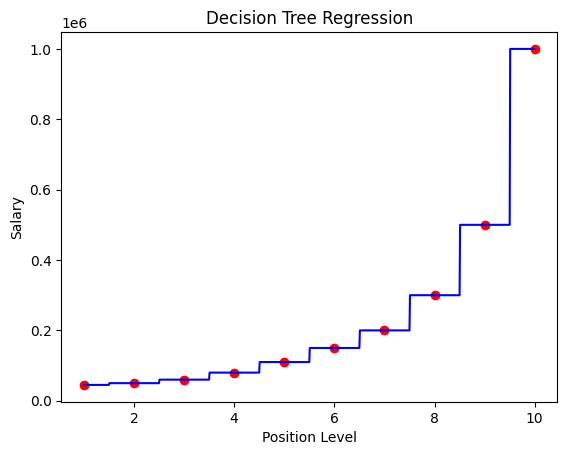

In [5]:
# Visualise
X_grid=np.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
# It is a nonlinear regression model
# Because the model takes the average value of each group
# and assign this value for any variable that falls in that group
# so the graph is not continuous but rather it looks like
# a staircase